<a href="https://colab.research.google.com/github/bitwoman/estudos-web-scrapings-python/blob/main/EstudoWebScrapingPythonV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*O ponto a ser considerado é que a beautifulsoup4 é válida para sites estáticos, caso seja dinâmico, o código vai quebrar e parar de funcionar.*

**Verificar se os pacotes estão instalados e/ou qual versão**

In [ ]:
pip show requests

Name: requests
Version: 2.31.0
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, huggingface-hub, kaggle, kagglehub, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, spacy, Sphinx, tensorboard, tensorflow-datasets, torchtext, transformers, tweepy, weasel, yfinance


In [ ]:
pip show beautifulsoup4

Name: beautifulsoup4
Version: 4.12.3
Summary: Screen-scraping library
Home-page: 
Author: 
Author-email: Leonard Richardson <leonardr@segfault.org>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: soupsieve
Required-by: gdown, google, nbconvert, yfinance


**Instalação dos pacotes - se necessários**

In [ ]:
pip install requests

In [ ]:
pip install beautifulsoup4

**Importação das bibliotecas**

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# a variável denominada "url" vai nos permitir entrar no link para fazer as requisições para pegar as informações
url = 'https://www.google.com/search?q=cotacao+dolar'

# faz uma requisicao no parâmetro que foi passado e guarda numa variável
#requisicao = requests.get(url)

# Para conseguirmos capturar o conteúdo, precisamos criar uma header para utilizarmos a informação
# para passar para a requisicao
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}
requisicao = requests.get(url, headers = headers)

In [ ]:
# o print retorna o status da requisição, neste caso, foi realizada com sucesso "<Response [200]>"
# pois quando o código retornado se inicia com 2 indica que a requisição foi bem-sucedida.
print(requisicao)

<Response [200]>


<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>cotacao dolar - Google Search</title><script nonce="f8lgl2q_1XYzgX0KjA6IXg">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'ILR8Zr6tOvKv5NoPnbuZ8As',kEXPI:'31',kBL:'lClV',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&&window.google.kOPI!==0?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.ge
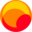
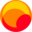
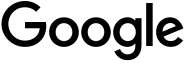
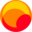
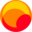

In [ ]:
# dentro da requisicao tem outras informações, pois retorna todo o código da página requisitada
print(requisicao.text)

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="origin" name="referrer"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   cotacao dolar - Google Search
  </title>
  <script nonce="f8lgl2q_1XYzgX0KjA6IXg">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'ILR8Zr6tOvKv5NoPnbuZ8As',kEXPI:'31',kBL:'lClV',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&&window.google.kOPI!==0?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}functi
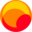
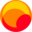
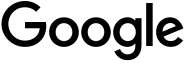
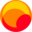
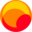

In [ ]:
# o BeautifulSoup vai organizar o código e deixá-lo em uma estrutura html
site = BeautifulSoup(requisicao.text, "html.parser")
print(site.prettify()) # o "prettify" vai deixar o código 'bonito'

In [ ]:
# exemplo de scraping
print(site.title)

# ou dessa forma
titulo = site.find('title')
print(titulo)

<title>cotacao dolar - Google Search</title>
<title>cotacao dolar - Google Search</title>


In [ ]:
pesquisaInput = site.find('input')
print(pesquisaInput)

<input name="sca_esv" type="hidden" value="456661df481d90bc"/>


In [ ]:
# # ele retorna 'None' pois o google sabe que a requisição está sendo feito via código
# pesquisa3 = site.find('input', class_='gLFyf') # tem que utilizar o _ no final da class por ser uma palavra reservada
# print(pesquisa3) # None

In [ ]:
getCotacaoInput = site.find("input", class_="a61j6")
print(getCotacaoInput['value'])

0.94


In [ ]:
getCotacaoTexto = site.find(class_="DFlfde SwHCTb")
print(getCotacaoTexto)
print(getCotacaoTexto['data-value'])

<span class="DFlfde SwHCTb" data-precision="2" data-value="0.9360999999999999">0.94</span>
0.9360999999999999


In [ ]:
teste = site.find("span", class_="eNFL1")
print(teste.get_text())

1
